In [132]:
# Se importan las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [133]:
# Carga de datos
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hospitalizaciones_test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hospitalizaciones_train.csv')

In [134]:
train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [135]:
test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [136]:
train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


In [137]:
# Se revisa la cantidad de datos nulos 
train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [138]:
test.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
dtype: int64

In [139]:
train.nunique()

Available Extra Rooms in Hospital        18
Department                                5
Ward_Facility_Code                        6
doctor_name                               9
staff_available                          11
patientid                            122394
Age                                      10
gender                                    3
Type of Admission                         3
Severity of Illness                       3
health_conditions                         6
Visitors with Patient                    28
Insurance                                 2
Admission_Deposit                    409682
Stay (in days)                           49
dtype: int64

In [140]:
# Identificar cada una de las variables categoricas
cat_columns = train.select_dtypes(['object']).columns
cat_columns_test = test.select_dtypes(['object']).columns

# Conversión de las variables categoricas a numericas
train[cat_columns] = train[cat_columns].apply(lambda x: pd.factorize(x)[0])
test[cat_columns_test] = test[cat_columns_test].apply(lambda x: pd.factorize(x)[0])

train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,0,0,0,0,33070,0,0,0,0,0,4,0,2966.408696,8
1,4,0,1,0,2,34808,1,0,0,1,1,2,1,3554.835677,9
2,2,0,1,0,8,44577,2,0,0,0,0,2,0,5624.733654,7
3,4,0,0,1,7,3695,1,0,1,2,2,4,1,4814.149231,8
4,2,1,2,2,10,108956,3,1,0,2,0,2,1,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,0,0,4,1,63105,1,0,0,1,4,3,0,3902.291076,8
409996,5,0,0,6,5,129292,2,0,0,0,3,4,1,4771.995223,9
409997,4,0,0,4,9,11399,2,0,2,1,4,4,0,3816.994210,9
409998,10,0,0,1,10,75003,2,0,0,2,3,2,0,3841.577491,9


Se analiza la correlación entre las variables

[Text(0.5, 1.0, 'Correlación entre las variables y columna objetivo')]

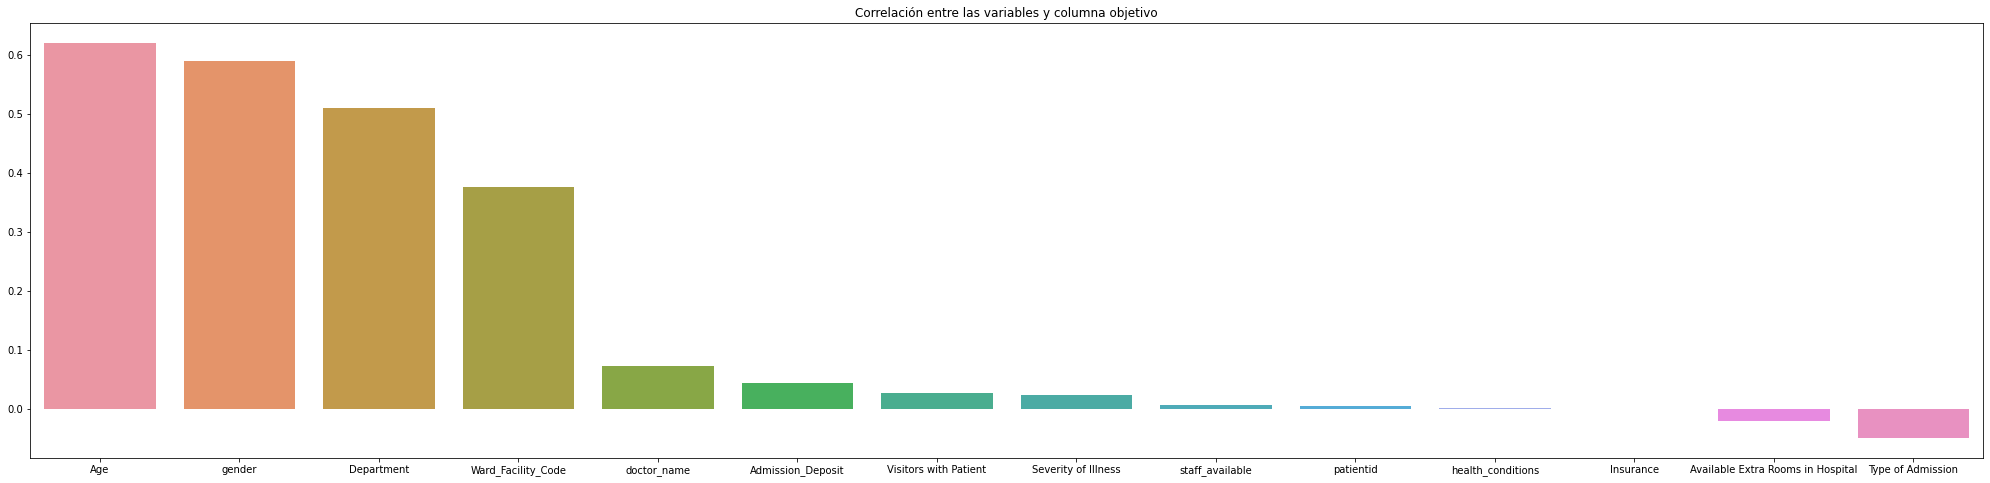

In [141]:
corr=train.corr().loc["Stay (in days)"]
corr.drop(["Stay (in days)"], axis=0, inplace=True) # Se elimina la columna objetivo

plt.figure(figsize=[35,8]) 

corr.sort_values(ascending=False, inplace=True)
corr_abs=abs(corr)
corr_abs.sort_values(ascending=False, inplace=True)

sns.barplot(x=corr.index, y=corr.values).set(title="Correlación entre las variables y columna objetivo")

Se utilizan las columnas con mayor correlación con la columna objetivo

In [142]:
x=train[['Department', 'Age','gender']]
x_test=test[['Department', 'Age','gender']]
y=train['Stay (in days)']
print(x.shape, y.shape)

(410000, 3) (410000,)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(287000, 3)
(123000, 3)
(287000,)
(123000,)


In [144]:
reg = LinearRegression(fit_intercept = True)
reg.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)
print(reg.rank_)

[0.33060275 2.05827416 5.74588076]
5.971356385325179
3


In [145]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print('Error en datos de entrenamiento:', mean_squared_error(y_train, y_train_pred,squared=False))
print('Error en datos de prueba:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de entrenamiento: 5.255454637931736
Error en datos de prueba: 5.270081767160824


In [146]:
y_test_pred = reg.predict(x_test)
y_test_pred

array([ 5.97135639,  8.36023329, 14.4367168 , ..., 20.37927547,
       18.98220681, 12.14617885])

In [147]:
df = pd.DataFrame(y_test_pred)
df.columns = ['pred']
df['pred'] = round(df['pred'], 2)
df

,pred
0,5.97
1,8.36
2,14.44
3,5.97
4,9.02
...,...
89995,20.38
89996,14.20
89997,20.38
89998,18.98


In [148]:
df.to_csv('slgonzalezp.csv', index=False)